In [31]:
#先装一下 我会使用类
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import pandas as pd
from scipy.optimize import curve_fit
from scipy.fftpack import fft, ifft, fftfreq
from scipy.signal import find_peaks

In [174]:
#SIR navie
class naiveSIR(object):
    #we should initial the class
    def __init__(hard,x0,y0,z0,beta,gamma):
        hard.x=x0
        hard.y=y0
        hard.z=z0
        hard.gamma=gamma
        hard.beta=beta
        hard.t=0
        hard.N=hard.x+hard.y+hard.z
        hard.xlist=[]
        hard.ylist=[]
        hard.zlist=[]
        hard.Nlist=[]
        hard.tlist=[]               

    def event(hard):
        hard.recordevents()
        #initial parameter
        hard.transrate=hard.beta*hard.x*hard.y/hard.N
        hard.recorate=hard.gamma*hard.y
        hard.totalrate=hard.transrate+hard.recorate
    #create detat
        hard.detat= (-np.log(
                             (pl.rand())
                            )
                    )/(hard.totalrate)
        #t
        hard.t=hard.t+hard.detat
        #createP
        hard.eventP= pl.rand()*hard.totalrate
        #transmission 
        if 0< hard.eventP<=hard.transrate:
            hard.x-=1
            hard.y+=1
        #recovery
        elif hard.transrate< hard.eventP<=hard.totalrate:
            hard.y-=1
            hard.z+=1
        else:
            print('end')
               
    def recordevents(hard):
        hard.xlist.append(hard.x)
        hard.ylist.append(hard.y)
        hard.zlist.append(hard.z)
        hard.tlist.append(hard.t)
        hard.N=hard.x+hard.y+hard.z
        hard.Nlist.append(hard.N)
        

In [187]:
X0 = 999
Y0 = 1
Z0 = 0
beta = 1
gamma = 1/3
t0 = 200
solution = naiveSIR(X0, Y0, Z0, beta, gamma)


while solution.t <= t0:
    if solution.y==0:
        break
    else:
        solution.event()
    

# SIR NO DEMOGRAPHY

plt.plot(solution.tlist, np.array(solution.xlist), c="b", label="Susceptible")
plt.plot(solution.tlist, np.array(solution.ylist), c="r", label="Infectious")
plt.plot(solution.tlist, np.array(solution.zlist), c="g", label="Recovered")
plt.legend()
plt.xlabel("Time/days")
plt.ylabel("number")
plt.title("Naive SIR")
plt.show()


In [218]:
#SIR Demography 
class demographySIR(object):
    #we should initial the class
    def __init__(hard,x0,y0,z0,beta,gamma,v,mu):
        naiveSIR.__init__(hard, x0,y0,z0,beta,gamma)
        hard.v=v
        hard.mu=mu
    def event1(hard):
        hard.recordevents()
        hard.N=hard.x+hard.y+hard.z
        hard.transrate=hard.beta*hard.x*hard.y/hard.N
        hard.recorate=hard.gamma*hard.y
        hard.birthrate=hard.v*hard.N
        hard.deathxrate=hard.mu*hard.x
        hard.deathyrate=hard.mu*hard.y
        hard.deathzrate=hard.mu*hard.z
        hard.totalrate=hard.transrate+hard.recorate+ hard.birthrate+hard.deathxrate+hard.deathyrate+hard.deathzrate
    #create detat
        hard.detat= (-np.log(
                             (pl.rand())
                            )
                    )/(hard.totalrate)
        #t
        hard.t=hard.t+hard.detat
        #createP
        hard.eventP= pl.rand()*hard.totalrate
        #transmission 
        if 0< hard.eventP<=hard.transrate:
            hard.x-=1
            hard.y+=1
        #recovery
        elif hard.transrate< hard.eventP<=hard.transrate+hard.recorate:
            hard.y-=1
            hard.z+=1
        elif hard.transrate+hard.recorate< hard.eventP<= hard.transrate+hard.recorate+hard.birthrate:
            hard.x+=1
        elif hard.transrate+hard.recorate+hard.birthrate< hard.eventP<= hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate:
            hard.x-=1
        elif hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate< hard.eventP<= hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate+hard.deathyrate:
            hard.y-=1
        elif hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate+hard.deathyrate< hard.eventP<= hard.totalrate:
            hard.z-=1
        else:
            print('end')
            
               
    def recordevents(hard):
        hard.xlist.append(hard.x)
        hard.ylist.append(hard.y)
        hard.zlist.append(hard.z)
        hard.tlist.append(hard.t)
        hard.N=hard.x+hard.y+hard.z
        hard.Nlist.append(hard.N)
        

In [198]:
#variablity

x0 = 9999
y0 = 1
z0 = 0
n0=10000
beta = 1
gamma = 1/3
v= mu = 1/60
timelist=[]
ystlist=[]
for i in np.arange(0,5,1):
    if i<=4:
        t0 = 200
        solution = demographySIR(x0, y0, z0, beta,gamma,v,mu)
        while solution.t <= t0:
            solution.event1()
        timelist.append(solution.tlist)
        ystlist.append(solution.ylist)
        plt.plot(timelist[i], ystlist[i],label="Simulation"+str(i+1))
plt.legend()
plt.xlabel("Time/days")
plt.ylabel("number")
plt.title("Stochastic SIR Demography")


Text(0.5, 1.0, 'Stochastic SIR Demography')

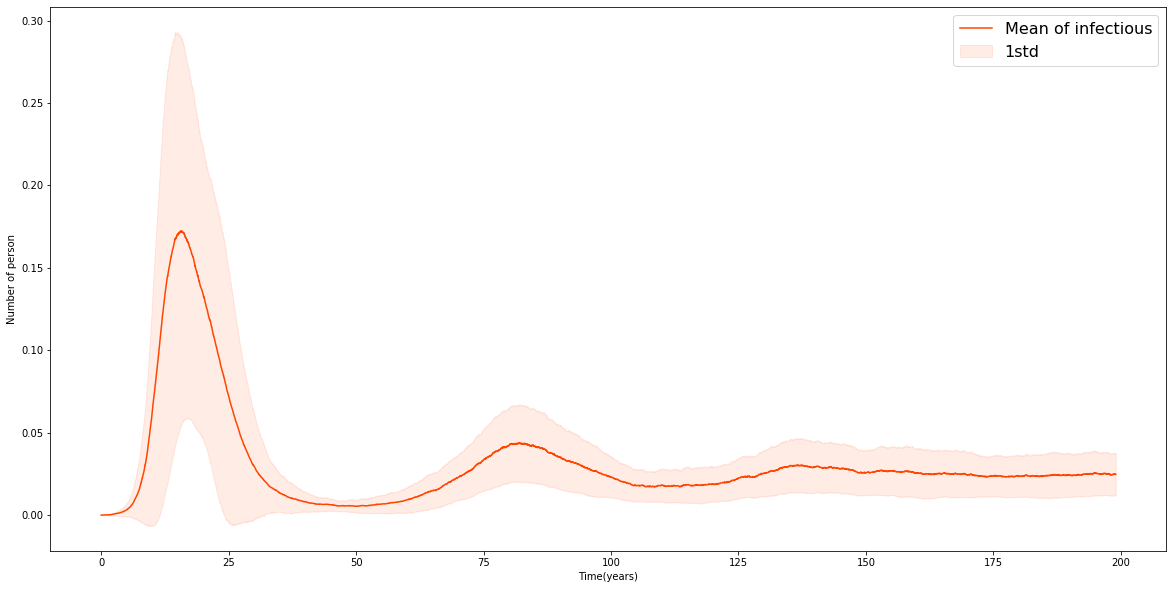

In [200]:
 
x0 = 9999
y0 = 1
z0 = 0
beta = 1
gamma = 1/3
v= mu = 1/60

t0 = 200
times=10
h=t0*100

yarray=np.zeros((times,h))
for time in range(times):
    solution = demographySIR(x0, y0, z0, beta,gamma,v,mu)
    while solution.t <= t0:
        solution.event1()
    y_liner=interp1d(solution.tlist,solution.ylist)
    tnew=np.linspace(0,int(solution.tlist[-1]),h)
    yarray[time]=y_liner(tnew)

meany=np.mean(yarray,axis=0)
stdy=np.std(yarray,axis=0)
%matplotlib inline
fig = plt.figure(figsize=(20, 10))
plt.plot(tnew,meany/10000,c='#FF4500',label='Mean of infectious')
plt.fill_between(tnew,(meany+stdy)/10000,(meany-stdy)/10000,color='#FF4500',alpha=0.1, edgecolor="white",label='1std')
plt.legend(fontsize=16)
plt.xlabel("Time(years)")
plt.ylabel("Number of person")
plt.show()


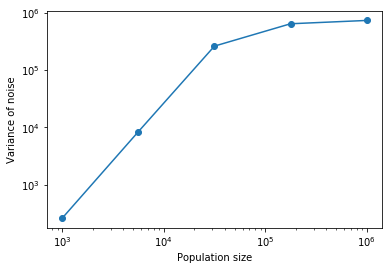

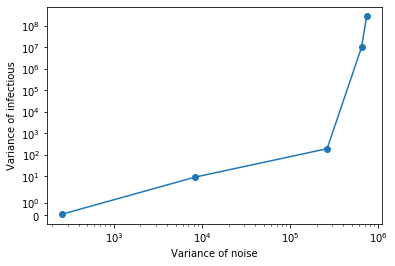

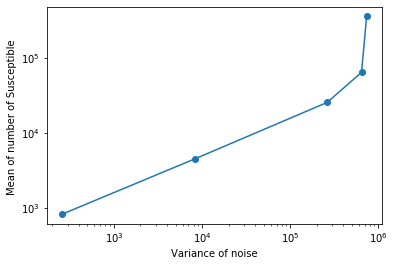

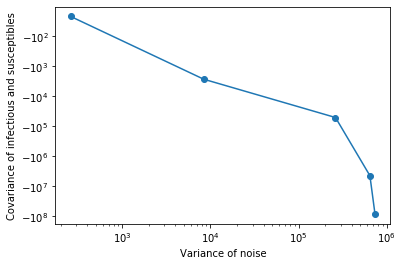

In [327]:
#variance/covariance


def SIRmodel_demography(h,t,N,beta,gamma,mu):
    x,y,z=h
    dSdt=mu*N-beta*x*y/N-mu*x
    dIdt=beta*x*y/N-(mu+gamma)*y
    dRdt=gamma*y-mu*z
    return([dSdt,dIdt,dRdt])

beta = 1
gamma = 1/3
mu_death = 1/60
v_birth = mu_death
t0 = 300
t = np.linspace(0, t0-1, t0*100)
# DETERMINSTIC PLOT


totalN = np.logspace(3,6,5)

varnoise = []
covinfsu = []
meaninf=[]
meansus=[]
varninf=[]
for population in totalN:
    # INITIAL CONDITIONS
    x0 = population*0.09
    y0 = population*0.005
    z0 = population*0.9
    n0 = population

    # DETERMINSTIC MODEL
    desolution= odeint(SIRmodel_demography, (x0, y0, z0), t, args=(n0, beta, gamma, mu_death))
    deX = np.array(desolution[:, 0])
    deY = np.array(desolution[:, 1])

    # STOCHASTIC MODEL
    stsolution = demographySIR(x0, y0, z0, beta, gamma, v_birth, mu_death)
    while stsolution.t <= t0:
        stsolution.event1()
    X1 = interp1d(stsolution.tlist, stsolution.xlist)
    Y1 = interp1d(stsolution.tlist, stsolution.ylist)
    interX = X1(t)
    interY = Y1(t)
    # DIFFERENCE OF DETERMINSTIC AND STOCHASTIC
    # NOTE maybe use uninterpolated values?
#     meaninf.append(np.mean(interY))
#     meansus.append(np.mean(interX))
    meaninf.append(np.mean(interY))
    meansus.append(np.mean(interX))
    varnoise.append(np.var(deY-interY))
    varninf.append(np.var(interY))
#     covinfsu.append(np.cov(interX, interY)[1,0])
    covinfsu.append(np.cov(stsolution.xlist,stsolution.ylist)[1,0])

%matplotlib inline
fig = plt.figure()
plt.plot(totalN, varnoise, "o-")
plt.xscale("log")
plt.yscale("symlog")
plt.xlabel("Population size")
plt.ylabel("Variance of noise")
plt.savefig('POP.jpg')

fig = plt.figure()
plt.plot(varnoise, varninf, "o-")
plt.xscale("log")
plt.yscale("symlog")
plt.xlabel("Variance of noise")
plt.ylabel("Variance of infectious")
plt.savefig('Varianceinf.jpg')

fig = plt.figure()
plt.plot(varnoise, meansus, "o-")
plt.xscale("log")
plt.yscale("symlog")
plt.xlabel("Variance of noise")
plt.ylabel("Mean of number of Susceptible ")
plt.savefig('Variancesus.jpg')

fig = plt.figure()
plt.plot(varnoise, covinfsu, "o-")
plt.xscale("log")
plt.yscale("symlog")
plt.xlabel("Variance of noise")
plt.ylabel("Covariance of infectious and susceptibles")
plt.savefig('cVariancesus.jpg')

plt.show()


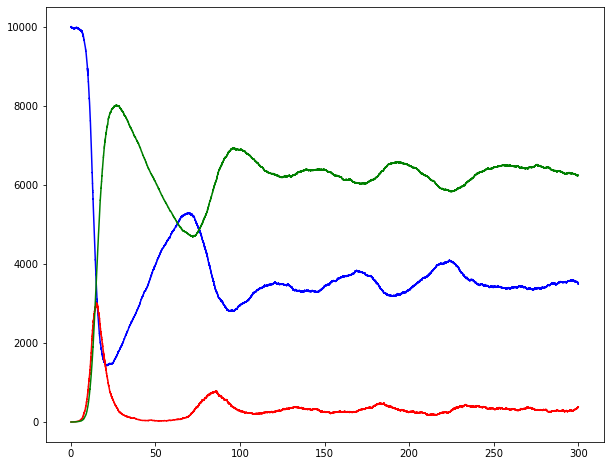

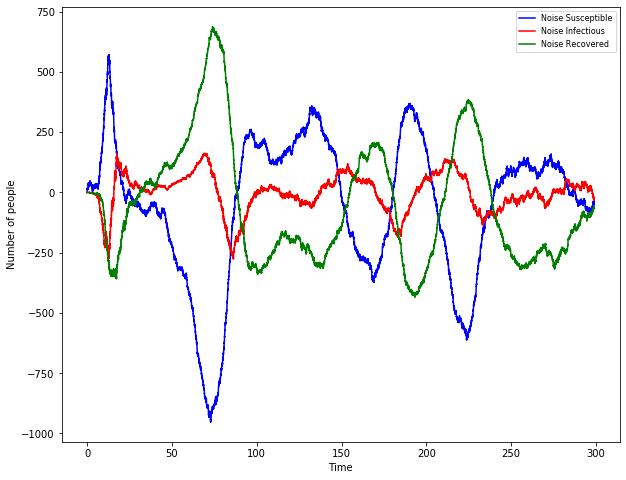

In [18]:
# x0 = 9999
# y0 = 1
# z0 = 0
# N0=10000

# beta = 1
# gamma = 1/3
# mu_death = 1/60
# v = mu
# t0 = 300
# t = np.linspace(0, t0-1, t0*100)
# R0=beta/(gamma+mu)


# desolution= odeint(SIRmodel_demography, [x0, y0, z0], t, args=(N0, beta, gamma, mu))
# X0=desolution[:,0]
# Y0=desolution[:,1]
# Z0=desolution[:,2]

# stsolution = demographySIR(x0, y0, z0, beta, gamma, v_birth, mu_death)
# while stsolution.t <= t0:
#     stsolution.event1()

# X1 = interp1d(stsolution.tlist, stsolution.xlist)
# Y1 = interp1d(stsolution.tlist, stsolution.ylist)
# Z1 = interp1d(stsolution.tlist, stsolution.zlist)
# x11=X1(t)
# y11=Y1(t)
# z11=Z1(t)

# plt.figure(figsize=(10, 8))
# plt.plot(stsolution.tlist, stsolution.xlist, "b", label="Stochastic Susceptible")
# plt.plot(stsolution.tlist, stsolution.ylist, "r", label="Stochastic Infectious")
# plt.plot(stsolution.tlist, stsolution.zlist, "g", label="Stochastic Recovered")

# # plt.hlines(Xequal, xmin=0, xmax=stsolution.tlist[-1]-1, color="g",linestyles="dashed", label="Equilibrium of Susceptible")
# # plt.hlines(Yequal, xmin=0, xmax=stsolution.tlist[-1]-1, color="b",linestyles="dashed", label="Equilibrium of Infectious")
# # plt.hlines(Zequal, xmin=0, xmax=stsolution.tlist[-1]-1, color="r",linestyles="dashed", label="Equilibrium of Recovered")
# # plt.legend(loc=("upper right"),fontsize=8)
# # plt.xlabel('Time')
# # plt.ylabel('Number of people')
# # plt.show()

# plt.figure(figsize=(10, 8))
# plt.plot(t, X0-x11, c="b", label="Noise Susceptible")
# plt.plot(t, Y0-y11, c="r", label="Noise Infectious")
# plt.plot(t, Z0-z11, c="g", label="Noise Recovered")
# plt.legend(loc=("upper right"),fontsize=8)
# plt.xlabel('Time')
# plt.ylabel('Number of people')
# plt.show()

/Users/hernando/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


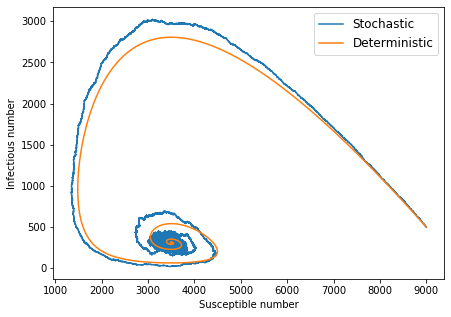

/Users/hernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


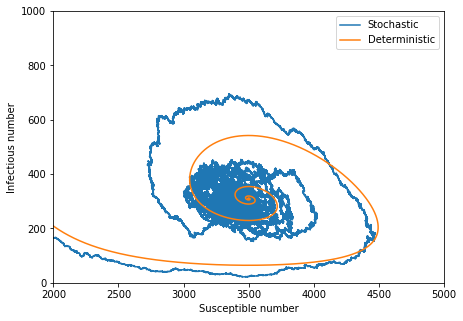

In [205]:
beta = 1
gamma = 1/3
mu_death = 1/60
v_birth = 1/60
R_basic=beta/(mu_death+gamma)
total_population=1e4
X0 = total_population*0.9
Y0 = total_population*0.05
Z0 = total_population*0.01

time_length = 1000
interp1d_number=time_length*100
t=np.linspace(0,time_length-1,interp1d_number)

detem_SIR=odeint(SIRmodel_demography,[X0,Y0,Z0],t,args=(total_population,beta,gamma,mu_death))

dynamic_SIR=demographySIR(X0,Y0,Z0,beta,gamma,v_birth,mu_death)
while dynamic_SIR.t<time_length:
    dynamic_SIR.event1()
X_t_function=interp1d(dynamic_SIR.tlist,dynamic_SIR.xlist)    
Y_t_function=interp1d(dynamic_SIR.tlist,dynamic_SIR.ylist)
Z_t_function=interp1d(dynamic_SIR.tlist,dynamic_SIR.zlist)
X_newarray=X_t_function(t)
Y_newarray=Y_t_function(t)
Z_newarray=Z_t_function(t)


plt.figure(figsize=(7,5))
plt.plot(dynamic_SIR.xlist,dynamic_SIR.ylist,label='Stochastic')
plt.plot(detem_SIR[:,0],detem_SIR[:,1],label='Deterministic')
plt.xlabel('Susceptible number')
plt.ylabel('Infectious number')
plt.legend(fontsize=12)
plt.show()
plt.figure(figsize=(7,5))
plt.plot(dynamic_SIR.xlist,dynamic_SIR.ylist,label='Stochastic')
plt.plot(detem_SIR[:,0],detem_SIR[:,1],label='Deterministic')
plt.xlabel('Susceptible number')
plt.ylabel('Infectious number')
plt.legend(fontsize=10)
plt.xlim(2000,5000)
plt.ylim(0,1000)
plt.savefig('transient1.jpg')
plt.show()

/Users/hernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


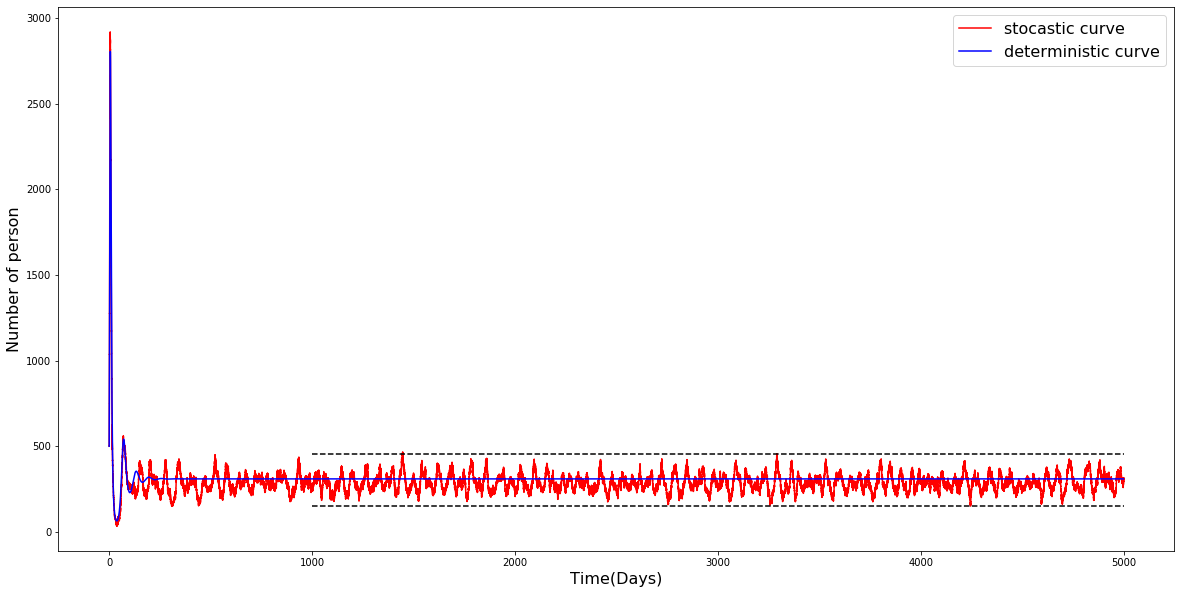

456.0 151.0 309.5238095238095


/Users/hernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


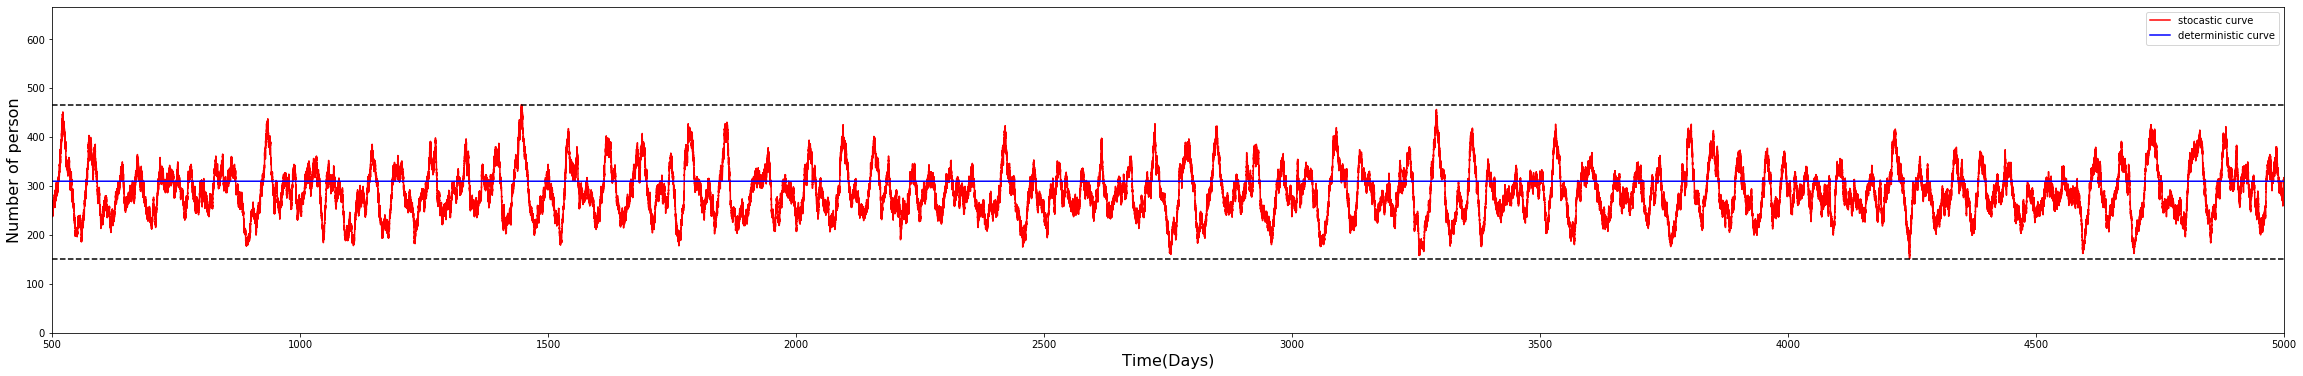

In [206]:

beta = 1
gamma = 1/3
mu_death = 1/60
v_birth = 1/60
R_basic=beta/(mu_death+gamma)
total_population=1e4
X0 = total_population*0.9
Y0 = total_population*0.05
Z0 = total_population*0.01

time_length = 5000
interp1d_number=time_length*100
t=np.linspace(0,time_length-1,interp1d_number)

dynamic_SIR=demographySIR(X0,Y0,Z0,beta,gamma,v_birth,mu_death)
while dynamic_SIR.t<time_length:
    dynamic_SIR.event1()
X_t_function=interp1d(dynamic_SIR.tlist,dynamic_SIR.xlist)    
Y_t_function=interp1d(dynamic_SIR.tlist,dynamic_SIR.ylist)
Z_t_function=interp1d(dynamic_SIR.tlist,dynamic_SIR.zlist)
X_newarray=X_t_function(t)
Y_newarray=Y_t_function(t)
Z_newarray=Z_t_function(t)

plt.figure(figsize=(20,10))
detem_SIR=odeint(SIRmodel_demography,[X0,Y0,Z0],t,args=(total_population,beta,gamma,mu_death))
Y_equil=((R_basic*v_birth-mu_death)*total_population)/beta
noise_X=X_newarray-detem_SIR[:,0]
noise_Y=Y_newarray-detem_SIR[:,1]
noise_Z=Z_newarray-detem_SIR[:,2]
plt.plot(dynamic_SIR.tlist,dynamic_SIR.ylist,'r-',label='stocastic curve')
len_Y=len(dynamic_SIR.ylist)
resonance_max=np.max(dynamic_SIR.ylist[int(len_Y/3):len_Y-1])
resonance_min=np.min(dynamic_SIR.ylist[int(len_Y/3):len_Y-1])
plt.plot([1000,5000],[resonance_max,resonance_max],'k--')
plt.plot([1000,5000],[resonance_min,resonance_min],'k--')
plt.plot(t,detem_SIR[:,1],'b-',label='deterministic curve')
plt.legend(fontsize=16)
plt.xlabel("Time(Days)",fontsize=16)
plt.ylabel("Number of person",fontsize=16)
plt.savefig('Transient2.jpg')
plt.show()
print(resonance_max,resonance_min,Y_equil)

plt.figure(figsize=(40,6))
detem_SIR=odeint(SIRmodel_demography,[X0,Y0,Z0],t,args=(total_population,beta,gamma,mu_death))
Y_equil=((R_basic*v_birth-mu_death)*total_population)/beta
plt.plot(dynamic_SIR.tlist,dynamic_SIR.ylist,'r-',label='stocastic curve')
len_Y=len(dynamic_SIR.ylist)
resonance_max=np.max(dynamic_SIR.ylist[int(len_Y/10):len_Y-1])
resonance_min=np.min(dynamic_SIR.ylist[int(len_Y/10):len_Y-1])
plt.plot([500,5000],[resonance_max,resonance_max],'k--')
plt.plot([500,5000],[resonance_min,resonance_min],'k--')
plt.plot(t,detem_SIR[:,1],'b-',label='deterministic curve')
plt.xlabel("Time(Days)",fontsize=16)
plt.ylabel("Number of person",fontsize=16)
plt.xlim(500,5000)
plt.ylim(0,resonance_max+200)
plt.legend()
plt.savefig('Transient3.jpg')
plt.show()

In [225]:
#resonance

x0 = 9999
y0 = 1
z0 = 0
N0=10000

beta = 1
gamma = 1/3
mu_death = 1/60
v = mu
t0 = 2000
t = np.linspace(0, t0-1, t0*100)
R0=beta/(gamma+mu)


desolution= odeint(SIRmodel_demography, [x0, y0, z0], t, args=(N0, beta, gamma, mu))
X0=desolution[:,0]
Y0=desolution[:,1]
Z0=desolution[:,2]

stsolution = demographySIR(x0, y0, z0, beta, gamma, v_birth, mu_death)
while stsolution.t <= t0:
    stsolution.event1()

X1 = interp1d(stsolution.tlist, stsolution.xlist)
Y1 = interp1d(stsolution.tlist, stsolution.ylist)
Z1 = interp1d(stsolution.tlist, stsolution.zlist)
x11=X1(t)
y11=Y1(t)
z11=Z1(t)

normlized_fft_I and length of frequ: 200000 200000
Frequency and Amplitude: 0.0155 0.001540246182120357


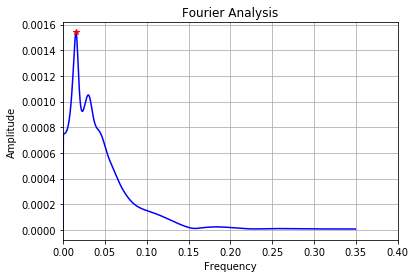

In [226]:
time_spacing=1/100
t= np.linspace(0, t0-1, t0*100)
fft_I = fft(Y0/10000-np.mean(Y0/10000))
## FFT return the Normlized magnitute of wave of each freq
normlized_fft_I = abs(fft_I)/len(t)
#find frequency

X_freq = fftfreq(normlized_fft_I.size, time_spacing)#in order to find the x axis
#fftfreq(n, d)  n : int Window length.   d : scalarSample spacing
print("normlized_fft_I and length of frequ:", normlized_fft_I.size,len(X_freq))
plt.plot(X_freq[0:700],normlized_fft_I[0:700], c="blue")  # First freq can be aboundent
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0,0.4)
plt.title("Fourier Analysis")

#find peaks
peaks, _ = find_peaks(normlized_fft_I[0:150], height=0.0014)#height can be dicided by u and initial is the minimum 

for i in range(len(peaks)):
    print("Frequency and Amplitude:",X_freq[peaks[i]],normlized_fft_I[peaks[i]])
    x=X_freq[peaks[i]]
    y=normlized_fft_I[peaks[i]]
    plt.plot(x,y,"r*")
    
plt.savefig('Natural.jpg')

normlized_fft_I and length of frequ: 200000 200000
Frequency and Amplitude: 0.0165 0.002418284020955017


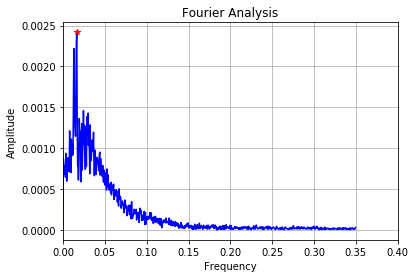

In [228]:
time_spacing=1/100
t= np.linspace(0, t0-1, t0*100)
fft_I = fft(y11/10000-np.mean(y11/10000))
## FFT return the Normlized magnitute of wave of each freq
normlized_fft_I = abs(fft_I)/len(t)
#find frequency

X_freq = fftfreq(normlized_fft_I.size, time_spacing)#in order to find the x axis
#fftfreq(n, d)  n : int Window length.   d : scalarSample spacing
print("normlized_fft_I and length of frequ:", normlized_fft_I.size,len(X_freq))
plt.plot(X_freq[0:700],normlized_fft_I[0:700], c="blue")  # First freq can be aboundent
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0,0.4)
plt.title("Fourier Analysis")

#find peaks
peaks, _ = find_peaks(normlized_fft_I[0:150], height=0.0023)#height can be dicided by u and initial is the minimum 

for i in range(len(peaks)):
    print("Frequency and Amplitude:",X_freq[peaks[i]],normlized_fft_I[peaks[i]])
    x=X_freq[peaks[i]]
    y=normlized_fft_I[peaks[i]]
    plt.plot(x,y,"r*")

plt.savefig('Sto.jpg')

In [231]:
#SIR Demography import
class importSIR(object):
    #we should initial the class
    def __init__(hard,x0,y0,z0,beta,gamma,v,mu):
        naiveSIR.__init__(hard, x0,y0,z0,beta,gamma)
        hard.v=v
        hard.mu=mu
    
    def event1(hard):
        hard.recordevents()
        hard.N=hard.x+hard.y+hard.z
        hard.transrate=hard.beta*hard.x*hard.y/hard.N
        if hard.transrate <= 0:  # In case transmission term <0
            hard.transrate = 0
        hard.recorate=hard.gamma*hard.y
        hard.birthrate=hard.v*hard.N
        hard.deathxrate=hard.mu*hard.x
        hard.deathyrate=hard.mu*hard.y
        hard.deathzrate=hard.mu*hard.z
        hard.importrate=0.02*np.sqrt(hard.N)
        hard.totalrate=hard.transrate+hard.recorate+ hard.birthrate+hard.deathxrate+hard.deathyrate+hard.deathzrate+hard.importrate
    #create detat
        hard.detat= (-np.log(
                             (pl.rand())
                            )
                    )/(hard.totalrate)
        #t
        hard.t=hard.t+hard.detat
        #createP
        hard.eventP= pl.rand()*hard.totalrate
        #transmission 
        if 0< hard.eventP<=hard.transrate:
            hard.x-=1
            hard.y+=1
        #recovery
        elif hard.transrate< hard.eventP<=hard.transrate+hard.recorate:
            hard.y-=1
            hard.z+=1
        elif hard.transrate+hard.recorate< hard.eventP<= hard.transrate+hard.recorate+hard.birthrate:
            hard.x+=1
        elif hard.transrate+hard.recorate+hard.birthrate< hard.eventP<= hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate:
            hard.x-=1
        elif hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate< hard.eventP<= hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate+hard.deathyrate:
            hard.y-=1
        elif hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate+hard.deathyrate< hard.eventP<= hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate+hard.deathyrate+hard.importrate:
            hard.y+=1
        elif hard.transrate+hard.recorate+hard.birthrate+hard.deathxrate+hard.deathyrate+hard.importrate< hard.eventP<= hard.totalrate:
            hard.z-=1
        else:
            print('end')
            
               
    def recordevents(hard):
        hard.xlist.append(hard.x)
        hard.ylist.append(hard.y)
        hard.zlist.append(hard.z)
        hard.tlist.append(hard.t)
        hard.N=hard.x+hard.y+hard.z
        hard.Nlist.append(hard.N)

<Figure size 1440x720 with 0 Axes>

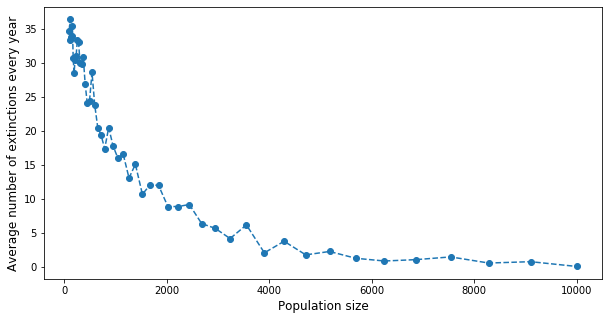

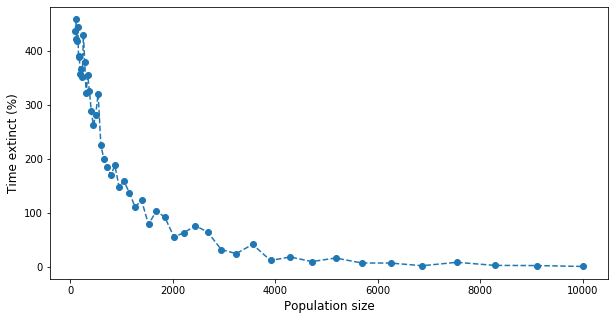

In [235]:
beta = 1
gamma = 1/3
mu= 1/60/365
v = mu
years = 10
time_length = 365*years

totalpeople = np.logspace(2, 4, 50)
extinctionnumber = []
extime=[]
fig = plt.figure(figsize=(20, 10))
for totalN in totalpeople:
    x0 = int(totalN*0.1)
    y0 = int(totalN*0.1)
    z0 = int(totalN*0.8)
    N0 = totalN
    extinction_number = 0
    cum_ext_time = 0
    determinde=0
    # STOCHASTIC MODEL
    impsolution = importSIR(x0, y0, z0, beta, gamma, v, mu)
    while impsolution.t <= time_length :
        if impsolution.y>0:
            determinde=0
        if impsolution.y <= 0 and determinde==0:
            determinde +=1
            extinction_number+=1
        if impsolution.y <= 0 and determinde==1:
            cum_ext_time += impsolution.detat    
        impsolution.event1()
        

    extinctionnumber.append(extinction_number)
    extime.append(cum_ext_time)

fig = plt.figure(figsize=(10, 5))
plt.plot(totalpeople, np.array(extinctionnumber)/years, "o--")
plt.xlabel("Population size", fontsize=12)
plt.ylabel("Average number of extinctions every year", fontsize=12)
plt.savefig('Extinction1.jpg')
plt.show()

fig = plt.figure(figsize=(10, 5))
# plt.plot(totalpeople, np.array(extime)/max(extime)*100, "*--")
plt.plot(totalpeople, np.array(extime), "o--")
plt.xlabel("Population size", fontsize=12)
plt.ylabel("Time extinct (%)", fontsize=12)
# print("initial total population list:", total_population_list)
# print("extinction count list:", extinction_count_list)
# print("cumulative extinction time list:", cum_ext_time_list)
plt.savefig('Extinction2.jpg')
plt.show()



<Figure size 1440x720 with 0 Axes>

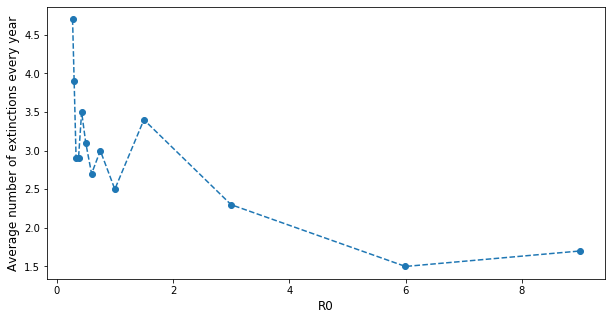

In [295]:

gamma = 1/3
mu= 1/60/365
v = mu
years = 10
time_length = 365*years
betalist=[1/11,1/10,1/9,1/8,1/7,1/6,1/5,1/4,1/3,1/2,1,2,3]
X=len(betalist)
# totalpeople = np.logspace(2, 4, 1)
totalpeople = 5000
extinctionnumber = []
extime=[]
R0list=[]
fig = plt.figure(figsize=(20, 10))
averagex=[]

for beta in betalist:
    totalN=totalpeople
    R0=beta/(gamma+mu)
    R0list.append(R0)
    x0 = int(totalN*0.1)
    y0 = int(totalN*0.1)
    z0 = int(totalN*0.8)
    N0 = totalN
    extinction_number = 0
    cum_ext_time = 0
    determinde=0
    # STOCHASTIC MODEL
    impsolution = importSIR(x0, y0, z0, beta, gamma, v, mu)
    while impsolution.t <= time_length :
        if impsolution.y>0:
            determinde=0
        if impsolution.y <= 0 and determinde==0:
            determinde +=1
            extinction_number+=1
        if impsolution.y <= 0 and determinde==1:
            cum_ext_time += impsolution.detat    
        impsolution.event1()
    extinctionnumber.append(extinction_number)
    extime.append(cum_ext_time)

# fig = plt.figure(figsize=(10, 5))
# plt.plot(totalpeople, np.array(extinctionnumber)/years, "o--")
# plt.xlabel("Population size", fontsize=12)
# plt.ylabel("Average number of extinctions every year", fontsize=12)
# # plt.savefig('Extinction1.jpg')
# plt.show()

# fig = plt.figure(figsize=(10, 5))
# # plt.plot(totalpeople, np.array(extime)/max(extime)*100, "*--")
# plt.plot(totalpeople, np.array(extime), "o--")
# plt.xlabel("Population size", fontsize=12)
# plt.ylabel("Time extinct (%)", fontsize=12)
# # print("initial total population list:", total_population_list)
# # print("extinction count list:", extinction_count_list)
# # print("cumulative extinction time list:", cum_ext_time_list)
# # plt.savefig('Extinction2.jpg')
# plt.show()

fig = plt.figure(figsize=(10, 5))
plt.plot(R0list,np.array(extinctionnumber)/years , "o--")
plt.xlabel("R0", fontsize=12)
plt.ylabel("Average number of extinctions every year", fontsize=12)
plt.savefig('Extinction3.jpg')
plt.show()

CCS is 5736
Maxextinction of population size 529.8316906283708


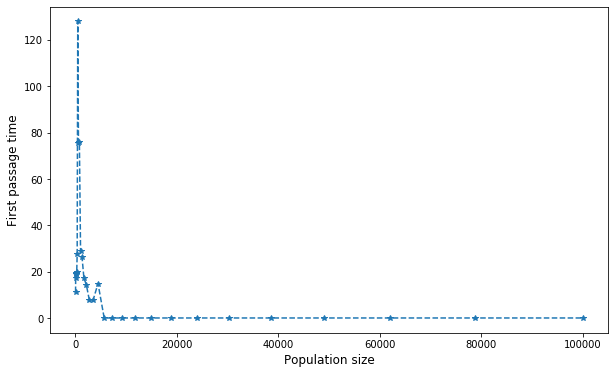

In [304]:
#First Passage time

beta = 1
gamma = 1/3
mu_death = 1/60
v_birth = mu_death
t0 = 365# We defined the CCS means the population size that experiences one extinction event per year
wholetime=[]
# Passage time list
totalpeople = np.logspace(2, 5, 30)
CCS=[]
for totalN in totalpeople:
    h=0
    x0 = int(totalN*0.1)
    y0 = int(totalN*0.1)
    z0 = int(totalN*0.8)
    N0 = totalN
    time=0
    #i为了生成五次simulation
    for i in np.arange(0,5,1):
        if i<=4:
            #mark为了标记第一次extinction
            markdfirst=False
            passolution = demographySIR(x0, y0, z0, beta, gamma, v_birth, mu_death)
            while passolution.t <= t0:
                passolution.event1()
                #出现第一次extinction
                if passolution.y <=0 and markdfirst==False:
                    time=time+passolution.t
                    markdfirst=True
                    #为了下一次extinction不执行
            if passolution.y>0:#为了输出五次都没有extinction
#                 print(totalN)
                h=h+1
            if h==5:
                CCS.append(totalN)
            
                
    wholetime.append(time/5)
    
fig = plt.figure(figsize=(10, 6))            
plt.plot(totalpeople, np.array(wholetime),'*--')
plt.xlabel("Population size", fontsize=12)
plt.ylabel("First passage time", fontsize=12) 
print('CCS is',int(CCS[0]))
print('Maxextinction of population size',totalpeople[wholetime.index(max(wholetime))])
plt.savefig('PAssage.jpg')

In [328]:
# #deterministic

# import scipy.integrate as spi
# import numpy as np
# import pylab as pl

# n=2;
# # beta=1.0*np.ones(n);
# # gamma=0.1*np.ones(n);
# # nu=0.0001*np.ones(n);
# # mu=0.0001*np.ones(n);
# # X0=0.1*np.ones(n);
# # Y0=0.0*np.ones(n); Y0[0]=0.0001;
# beta = 0.34*np.ones(n)
# gamma = 1/10*np.ones(n)
# nu = 0*np.ones(n)
# mu = 0*np.ones(n)
# X0 = 0.99*np.ones(n)
# Y0 = 0.0*np.ones(n)
# Y0[0] = 0.01
# p_arr = np.logspace(-7, 0, 8)

# INPUT=np.hstack((X0,Y0))

# for p21 in p_arr:
#     m = p21*np.ones((n, n))
#     m = m-np.diag(np.diag(m))
#     ND=MaxTime=200.0;
#     TS=1.0
#     def diff_eqs(INP,t):  
#         '''The main set of equations'''
#         Y=np.zeros((2*n))
#         V = INP   
#         for i in range(n):
# #             Y[i] = nu[i] - beta[i]*V[i]*V[n+i] - mu[i]*V[i]; 
# #             Y[n+i] = beta[i]*V[i]*V[n+i] - mu[i]*V[n+i] - gamma[i]*V[n+i]
#             Y[i] = nu[i] - beta[i]*V[i]*V[n+i]; 
#             Y[n+i] = beta[i]*V[i]*V[n+i] - gamma[i]*V[n+i]
#             for j in range(n):
#                 Y[i]+=m[i][j]*V[j] - m[j][i]*V[i];
#                 Y[n+i]+=m[i][j]*V[n+j] - m[j][i]*V[n+i];
#         return Y   # For odeint

#     t_start = 0.0; t_end = ND; t_inc = TS
#     t_range = np.arange(t_start, t_end+t_inc, t_inc)
#     result = spi.odeint(diff_eqs,INPUT,t_range)
#     plt.plot(t_range, result[:, 1+n],
#               label="ρ21 = "+str(p21))


In [315]:
class naive_SIR(object):#可继承
    def __init__(self,X0,Y0,Z0,beta,gamma):
        self.X=X0
        self.Y=Y0
        self.Z=Z0
        #self.N = self.X+self.Y+self.Z
        self.beta=beta
        self.gamma=gamma
        self.updateTotalRate()
        self.R_basic=self.beta/self.gamma
        self.t=0
        self.delta_t=0
        self.X_list=[]
        self.Y_list=[]
        self.Z_list=[]
        self.t_list=[]
        self.N_list=[]
        
    def diseaseTrans(self):
        self.X=self.X-1
        self.Y=self.Y+1
        
    def diseaseRecov(self):
        self.Y=self.Y-1
        self.Z=self.Z+1
    
    def recordStates(self):
        self.X_list.append(self.X)
        self.Y_list.append(self.Y)
        self.Z_list.append(self.Z)
        self.t_list.append(self.t)
        self.N=self.X+self.Y+self.Z
        self.N_list.append(self.N)
    
    def updateTotalRate(self):
        self.N=self.X+self.Y+self.Z
        self.trans_rate=self.beta*self.X*self.Y/self.N
        self.recov_rate=self.gamma*self.Y
        self.total_rate=self.trans_rate+self.recov_rate
    
    def nextEvent(self):
        self.recordStates()
        self.updateTotalRate()
        self.delta_t=getCDF_InverseExpoPoints(pl.rand(),self.total_rate)
        self.t=self.t+self.delta_t
        self.event_p=pl.rand()*self.total_rate
        if 0<self.event_p<=self.trans_rate:
            self.diseaseTrans()
        elif self.trans_rate<self.event_p<=(self.trans_rate+self.recov_rate):
            self.diseaseRecov()
        else:
            print('nothing happened',self.total_rate)
        
def getCDF_InverseExpoPoints(x_rand, lambda_exp):
    x_exp = -(np.log(1-x_rand))/(lambda_exp)
    return x_exp   


        
def subpopu_j(j_XYZ,t,N,beta,gamma):
    X,Y,Z=j_XYZ
    dxdt=-beta*X*Y/N
    dydt=beta*X*Y/N-gamma*Y
    dzdt=gamma*Y
    return [dxdt,dydt,dzdt]     
              
class metapopu_SIR(naive_SIR):
    def __init__(self,Xi,Yi,Zi,Xj,Yj,Zj,N_ij,beta,gamma,rho_ij):#,t_j):
        naive_SIR.__init__(self, Xi, Yi, Zi, beta, gamma)
        self.Xj=Xj
        self.Yj=Yj
        self.Zj=Zj
        self.Nj=N_ij
        self.rho_ij=rho_ij
        #self.tj=t_j
        #self.function_j()
        self.updateTotalRate_meta()
        self.R_basic=beta/gamma      
    
    def diseaseTrans_meta(self):
        self.diseaseTrans()
    
    def diseaseSpread_meta(self):
        self.X=self.X-1
        self.Y=self.Y+1

    def diseaseRecov_meta(self):
        self.diseaseRecov()
    
    def remain(self):
        self.X=self.X
        self.Y=self.Y
        self.Z=self.Z
        
    def recordStates_meta(self):
        self.recordStates()
    
    def function_j(self):
        initial_j=[self.Xj,self.Yj,self.Zj]
        time_window=np.linspace(0,self.t,1e3)
        integrate=odeint(subpopu_j,initial_j,time_window,args=(self.Nj,self.beta,self.gamma))
        #print("X",integrate[:,0])
        #print("",integrate[:,1])
        #self.func_j_X=interp1d(t_j,integrate[:,0])
        #self.func_j_Y=interp1d(t_j,integrate[:,1]) 
        self.j_X=integrate[:,0][-1]
        self.j_Y=integrate[:,1][-1]
        
    def updateTotalRate_meta(self):
        self.N=self.X+self.Y+self.Z
        self.function_j()
        #self.j_X=self.func_j_X(self.t)
        #self.j_Y=self.func_j_Y(self.t)  
        self.trans_rate = self.beta*self.X*self.Y/self.N
        self.recov_rate = self.gamma*self.Y
        self.j_trans_rate = self.beta*self.j_X*self.j_Y/self.Nj
        self.j_recov_rate = self.gamma*self.j_Y
        self.spread_rate= self.beta*self.rho_ij*self.X*self.j_Y/self.N
        self.total_rate = self.trans_rate+self.spread_rate+self.recov_rate+self.j_trans_rate+self.j_recov_rate 
        
    def nextEvent_meta(self):
        self.recordStates_meta()
        self.delta_t = getCDF_InverseExpoPoints(
            pl.rand(), self.total_rate)
        self.updateTotalRate_meta()
        self.t = self.t+self.delta_t
        self.event_p = pl.rand() * self.total_rate
        if 0<self.event_p<=self.j_trans_rate:
            self.remain()
            #print("remain_j_trans")#,self.j_X,self.j_Y,self.j_trans_rate)
        elif self.j_trans_rate<self.event_p<=self.j_trans_rate+self.j_recov_rate:
            self.remain()
            #print("remain_j_recov")#,self.j_X,self.j_Y,self.j_recov_rate)
        elif self.j_trans_rate+self.j_recov_rate<self.event_p<=self.j_trans_rate+self.j_recov_rate+self.spread_rate:
            self.diseaseSpread_meta()
            #print("spread")
        elif self.j_trans_rate+self.j_recov_rate+self.spread_rate<self.event_p<=self.j_trans_rate+self.j_recov_rate+self.spread_rate+self.trans_rate:
            self.diseaseTrans_meta()
            #print("trans")
        elif self.j_trans_rate+self.j_recov_rate+self.spread_rate+self.trans_rate<self.event_p<=self.total_rate:
            self.diseaseRecov_meta()
            #print("recov")
        else:
            print("nothing happened")  
        #print(self.X,self.Y,self.Z)
      

/Users/hernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


3.9681580876810822
4.556417506682387
6.80931724558342
4.870607997870358
9.360456587532902
8.864680891803927
11.585062447221137
16.402355941615486
16.97918788954894
0
0
0
0
0
0
0
0
0
0
0


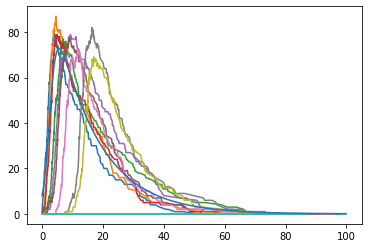

<Figure size 1440x720 with 0 Axes>

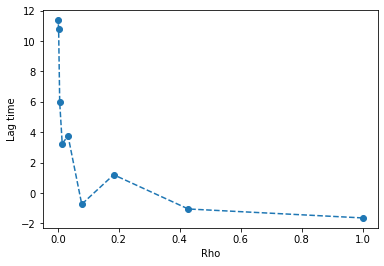

[1.0, 0.4281332398719394, 0.1832980710832436, 0.07847599703514614, 0.033598182862837826, 0.01438449888287663, 0.006158482110660267, 0.0026366508987303583, 0.0011288378916846896]
[-1.637447517924524, -1.049188098923219, 1.203711639977814, -0.7349976077352487, 3.7548509819272953, 3.2590752861983203, 5.979456841615531, 10.796750336009879, 11.373582283943332]


In [316]:
rho_list=np.logspace(0,-7,20)
beta = 1
gamma = 1/14
Xi = 100
Yi = 0
Zi = 0
Xj = 90
Yj = 8
Zj = 2
N_ij=100
time_length = 100
t_j=np.linspace(0,time_length,time_length*10)

X_meta_list=[]
Y_meta_list=[]
Z_meta_list=[]
t_meta_list=[]
lag_time_list=[]
rho_print_list=[]

determin_j=odeint(subpopu_j,[Xj,Yj,Zj],t_j,args=(N_ij,beta,gamma)) 
hj=t_j[list(determin_j[:,1]).index(max(determin_j[:,1]))]
# print(max(determin_j[:,1]))
# print(list(determin_j[:,1]).index(max(determin_j[:,1])))
#print(hj)
color_list = ["b","g","r","c","m","y","k","black"]
label_list=["ρ21 = 1","ρ21 = 0.1","ρ21 = 0.01","ρ21 = 0.001","ρ21 = 1e-04","ρ21 = 1e-05","ρ21 = 1e-06","ρ21 = 1e-07"]
for rho in rho_list:
    meta_SIR=metapopu_SIR(Xi,Yi,Zi,Xj,Yj,Zj,N_ij,beta,gamma,rho)#,t_j)
    while meta_SIR.t<time_length:
        meta_SIR.nextEvent_meta()
    X_meta_list.append(meta_SIR.X_list)
    Y_meta_list.append(meta_SIR.Y_list)
    Z_meta_list.append(meta_SIR.Z_list)
    t_meta_list.append(meta_SIR.t_list)
    hi=meta_SIR.t_list[meta_SIR.Y_list.index(max(meta_SIR.Y_list))]
    print(hi)
    if hi>0:
        lag_time_list.append(hi-hj)
        rho_print_list.append(rho)
        


times=len(Y_meta_list)
for i in range(times):
    plt.plot(t_meta_list[i],Y_meta_list[i])


plt.plot(t_j,determin_j[:,1])  
#plt.xlim(0,20)
plt.figure(figsize=(20,10))
plt.show()

# print(hj)
# print(rho_list)
# print(lag_time_list)
plt.plot(rho_print_list,lag_time_list,'o--')
plt.xlabel("Rho")
plt.ylabel("Lag time")
plt.savefig('differentrholag.jpg')
plt.show()
print(rho_print_list)
print(lag_time_list)
   


In [306]:
class SpatialnaiveSIR(object):   
    
    def __init__(hard,x0,x1,y0,y1,z0,z1,beta,gamma,rho):
        hard.x0=x0
        hard.x1=x1
        hard.y0=y0
        hard.y1=y1
        hard.z0=z0
        hard.z1=z1
        hard.gamma=gamma
        hard.beta=beta
        hard.N0=hard.x0+hard.y0+hard.z0
        hard.N1=hard.x1+hard.y1+hard.z1
        hard.rho=rho
        hard.t=0
        hard.y0list=[]
        hard.y1list=[]
        hard.x0list=[]
        hard.x1list=[]
        hard.z0list=[]
        hard.z1list=[]
        hard.tlist=[]               

    def event(hard):
        hard.recordevents()
        #initial parameter
        hard.transrate0=hard.beta*hard.x0*hard.y0/(hard.N0)
        hard.transrate1=hard.beta*hard.x1*hard.y1/(hard.N1)
        hard.recorate0=hard.gamma*hard.y0
        hard.recorate1=hard.gamma*hard.y1
        hard.rhorate=hard.beta*hard.rho*hard.y1
        hard.totalrate=hard.transrate0+hard.transrate1+hard.recorate0+hard.recorate1+hard.rhorate
    #create detat
        hard.detat= (-np.log(
                             (pl.rand())
                            )
                    )/(hard.totalrate)
        #t
        hard.t=hard.t+hard.detat
        #createP
        hard.eventP= pl.rand()*hard.totalrate
        #transmission 
        if 0< hard.eventP<=hard.transrate0:
            hard.x0-=1
            hard.y0+=1
        #recovery
        elif hard.transrate0< hard.eventP<=hard.transrate0+hard.transrate1:
            hard.x1-=1
            hard.y1+=1
        elif hard.transrate0+hard.transrate1< hard.eventP<=hard.transrate0+hard.transrate1+hard.recorate0:
            hard.y0-=1
            hard.z0+=1
        elif hard.transrate0+hard.transrate1+hard.recorate0< hard.eventP<hard.transrate0+hard.transrate1+hard.recorate0+hard.recorate1:
            hard.y1-=1
            hard.z1+=1
        elif hard.transrate0+hard.transrate1+hard.recorate0+hard.recorate1< hard.eventP<=hard.transrate0+hard.transrate1+hard.recorate0+hard.recorate1+hard.rhorate:
            hard.x0-=1
            hard.y0+=1
#         else:
#             print('end')
               
    def recordevents(hard):
        hard.x0list.append(hard.x0)
        hard.y0list.append(hard.y0)
        hard.z0list.append(hard.z0)
        hard.x1list.append(hard.x1)
        hard.y1list.append(hard.y1)
        hard.z1list.append(hard.z1)
        hard.tlist.append(hard.t)

Leg time is 22.30319578947946


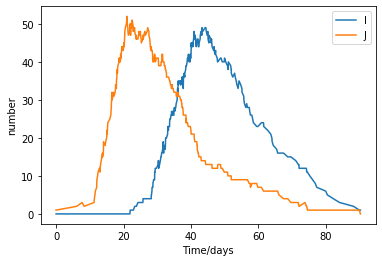

In [314]:
X0 = 100.
Y0 = 0.
Z0 = 0.
X1= 100.
Y1 = 1.
Z1= 0.
beta = 0.3745
gamma = 1/14
t0 = 200
rho=0.01
peaks_time_list=[]
solution = SpatialnaiveSIR(X0,X1, Y0,Y1, Z0,Z1,beta, gamma,rho)


while solution.t <= t0:
    if solution.y0==0 and solution.y1==0:
        break
    else:
        solution.event()
# SIR NO DEMOGRAPHY
h1=solution.y0list.index(max(solution.y0list))
h2=solution.y1list.index(max(solution.y1list))
# plt.plot(solution.tlist, np.array(solution.x0list), c="b", label="Susceptible")
plt.plot(solution.tlist, np.array(solution.y0list), label="I")
plt.plot(solution.tlist, np.array(solution.y1list), label="J")
# plt.plot(solution.tlist, np.array(solution.zlist), c="g", label="Recovered")
plt.legend()
plt.xlabel("Time/days")
plt.ylabel("number")
# plt.title("Naive SIR")

# plt.show()
print('Leg time is',solution.tlist[h1]-solution.tlist[h2])
plt.savefig('SUBleg.jpg')

In [317]:
class SpatialnaiveSIR5(object):   
    
    def __init__(hard,x0,x1,x2,x3,x4,y0,y1,y2,y3,y4,z0,z1,z2,z3,z4,beta,gamma,rho,rho1,rho2,rho3):
        hard.x0=x0
        hard.x1=x1
        hard.y0=y0
        hard.y1=y1
        hard.z0=z0
        hard.z1=z1
        hard.gamma=gamma
        hard.beta=beta
        hard.N0=hard.x0+hard.y0+hard.z0
        hard.N1=hard.x1+hard.y1+hard.z1
        hard.rho=rho
        hard.t=0
        hard.y0list=[]
        hard.y1list=[]
        hard.x0list=[]
        hard.x1list=[]
        hard.z0list=[]
        hard.z1list=[]
        hard.tlist=[]     
        hard.x2=x2
        hard.y2=y2
        hard.z2=z2
        hard.N2=hard.x2+hard.y2+hard.z2
        hard.y2list=[]
        hard.x2list=[]
        hard.z2list=[]
        hard.rho1=rho1
        hard.x3=x3
        hard.y3=y3
        hard.z3=z3
        hard.N3=hard.x3+hard.y3+hard.z3
        hard.y3list=[]
        hard.x3list=[]
        hard.z3list=[]
        hard.rho2=rho2
        
        hard.x4=x4
        hard.y4=y4
        hard.z4=z4
        hard.N4=hard.x4+hard.y4+hard.z4
        hard.y4list=[]
        hard.x4list=[]
        hard.z4list=[]
        hard.rho3=rho3

    def event(hard):
        hard.recordevents()
        #initial parameter
        hard.transrate0=hard.beta*hard.x0*hard.y0/(hard.N0)
        hard.transrate1=hard.beta*hard.x1*hard.y1/(hard.N1)
        hard.transrate2=hard.beta*hard.x2*hard.y2/(hard.N2)
        hard.transrate3=hard.beta*hard.x3*hard.y3/(hard.N3)
        hard.transrate4=hard.beta*hard.x4*hard.y4/(hard.N4)
        
        hard.recorate0=hard.gamma*hard.y0
        hard.recorate1=hard.gamma*hard.y1
        hard.recorate2=hard.gamma*hard.y2
        hard.recorate3=hard.gamma*hard.y3
        hard.recorate4=hard.gamma*hard.y4
        
        hard.rhorate=hard.beta*hard.rho*hard.y1*hard.x0/(hard.N0)
        hard.rhorate1=hard.beta*hard.rho1*hard.y1*hard.x2/(hard.N2)
        hard.rhorate2=hard.beta*hard.rho2*hard.y1*hard.x3/(hard.N3)
        hard.rhorate3=hard.beta*hard.rho3*hard.y1*hard.x4/(hard.N4)
        
        hard.totalrate=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4+hard.rhorate+hard.rhorate1+hard.rhorate2+hard.rhorate3
    #create detat

        hard.detat= (-np.log(
                             (pl.rand())
                            )
                    )/(hard.totalrate)
        #t
        hard.t=hard.t+hard.detat
        #createP
        hard.eventP= pl.rand()*hard.totalrate
        #transmission 
        if 0< hard.eventP<=hard.transrate0:
            hard.x0-=1
            hard.y0+=1

        #recovery
        elif hard.transrate0< hard.eventP<=hard.transrate0+hard.transrate1:
            hard.x1-=1
            hard.y1+=1

        elif hard.transrate0+hard.transrate1< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2:
            hard.x2-=1
            hard.y2+=1
        elif hard.transrate0+hard.transrate1+hard.transrate2< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3:
            hard.x3-=1
            hard.y3+=1
        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4:
            hard.x4-=1
            hard.y4+=1
 
        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0:
            hard.y0-=1
            hard.z0+=1

        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1:
            hard.y1-=1
            hard.z1+=1

        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2:
            hard.y2-=1
            hard.z2+=1
        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3:
            hard.y3-=1
            hard.z3+=1
        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4:
            hard.y4-=1
            hard.z4+=1

        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4+hard.rhorate:
            hard.x0-=1
            hard.y0+=1
 
        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4+hard.rhorate< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4+hard.rhorate+hard.rhorate1:
            hard.x2-=1
            hard.y2+=1
        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4+hard.rhorate+hard.rhorate1< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4+hard.rhorate+hard.rhorate1+hard.rhorate2:
            hard.x3-=1
            hard.y3+=1
        elif hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4+hard.rhorate+hard.rhorate1+hard.rhorate2< hard.eventP<=hard.transrate0+hard.transrate1+hard.transrate2+hard.transrate3+hard.transrate4+hard.recorate0+hard.recorate1+hard.recorate2+hard.recorate3+hard.recorate4+hard.rhorate+hard.rhorate1+hard.rhorate2+hard.rhorate3:
            hard.x4-=1
            hard.y4+=1

        else:
            print('end')
               
    def recordevents(hard):
        hard.x0list.append(hard.x0)
        hard.y0list.append(hard.y0)
        hard.z0list.append(hard.z0)
        hard.x1list.append(hard.x1)
        hard.y1list.append(hard.y1)
        hard.z1list.append(hard.z1)
        hard.x2list.append(hard.x2)
        hard.y2list.append(hard.y2)
        hard.z2list.append(hard.z2)
        hard.x4list.append(hard.x4)
        hard.y4list.append(hard.y4)
        hard.z4list.append(hard.z4)
        hard.x3list.append(hard.x3)
        hard.y3list.append(hard.y3)
        hard.z3list.append(hard.z3)
        hard.N0=hard.x0+hard.y0+hard.z0
        hard.N1=hard.x1+hard.y1+hard.z1
        hard.N2=hard.x2+hard.y2+hard.z2
        hard.N3=hard.x3+hard.y3+hard.z3
        hard.N4=hard.x4+hard.y4+hard.z4
        hard.tlist.append(hard.t)

/Users/hernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars


end


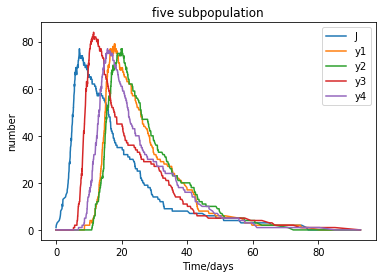

In [323]:
X0 = 100.
Y0 = 0.
Z0 =1.
X1= 100.
Y1 = 1.
Z1= 1.

X3= 100.
Y3 = 0.
Z3= 1.

X4= 100.
Y4 = 0.
Z4= 1.

X2= 100.
Y2 = 0.
Z2= 1.

beta = 1
gamma = 1/14
t0 = 2000

rho=0.001
rho1=0.002
rho2=0.01
rho3=0.02
peaks_time_list=[]


solution = SpatialnaiveSIR5(X0,X1,X2,X3,X4,Y0,Y1,Y2,Y3,Y4,Z0,Z1,Z2,Z3,Z4,beta, gamma,rho,rho1,rho2,rho3)
while solution.t <= t0:
    solution.event()

# SIR NO DEMOGRAPHY
# h1=solution.y0list.index(max(solution.y0list))
# h2=solution.y1list.index(max(solution.y1list))
# h3=solution.y2list.index(max(solution.y2list))
# plt.plot(solution.tlist, np.array(solution.x0list), c="b", label="Susceptible")
plt.plot(solution.tlist, np.array(solution.y1list), label="J")
plt.plot(solution.tlist, np.array(solution.y0list), label="y1")
plt.plot(solution.tlist, np.array(solution.y2list), label="y2")
plt.plot(solution.tlist, np.array(solution.y3list), label="y3")
plt.plot(solution.tlist, np.array(solution.y4list), label="y4")
# plt.plot(solution.tlist, np.array(solution.zlist), c="g", label="Recovered")
plt.legend()
plt.xlabel("Time/days")
plt.ylabel("number")
plt.title("five subpopulation")
plt.savefig('Five.jpg')

# plt.show()
# print('Leg time is',solution.tlist[h1]-solution.tlist[h2])


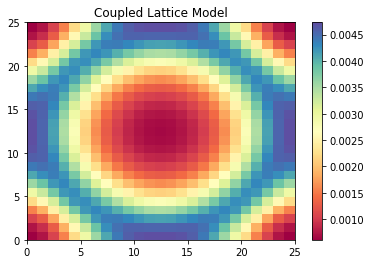

In [8]:
import scipy.integrate as spi
import numpy as np
import pylab as pl  

n=25;
beta=1.0;
gamma=0.1;
mu=0.0001;
rho=0.1;
X0=0.1;
nI=4.;
N0=1.0;
nu=mu
timestep=1.;
ND=MaxTime=365*4
X=X0*np.ones((n,n)); Y=np.zeros(n*n); 
ind=[312]
for i in range(len(ind)):
    Y[ind[i]]=0.001*X0;

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y
Y=np.reshape(Y, ((n,n)))
Y2=Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
### Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y


ola=np.zeros((n*n), dtype=np.integer)
for i in range(Size):
    for j in range(Size):
        ola[i*n+j]=i*Size*2+j

ola1=ola+n
tcS=[(n*n*X0)]
tcI=[sum(Y3[range(n*n)])]
tc22=np.zeros((n,n))


    ### You could also try plotting at each step but it is slow

for k in range(ND):
    t_range = np.arange(2.0)	
    RES = spi.odeint(diff_eqs,INPUT,t_range)
    INPUT=RES[-1]
        
        ### Changing the k%50 parameter you change the frames you are watching
        ###  With 1 you can see all the graphs
    if k%1==0:
        pl.clf()
        tc22=np.reshape(RES[-1][ola1], (n,n))
#         pl.figure(figsize=(5,5))
        pl.pcolor(tc22, cmap=pl.cm.Spectral)
        pl.title('Coupled Lattice Model')
        pl.colorbar()
        
            ### watch the progress
        pl.draw()
pl.show()

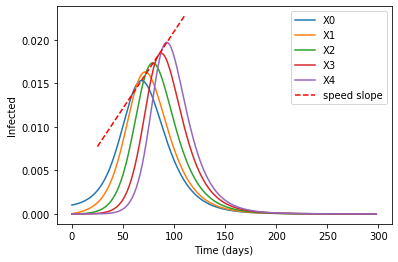

0.00017623830997728332


In [36]:
#lattice
import scipy.integrate as spi
import numpy as np
import pylab as pl  
import time, os

#final infectious list
infectious_list=[]
n=9;
beta=2
gamma=0.1;
mu=0.0001;
rho=0.1;
X0=0.1;
#nI=4;#初始化4个infectious patches
N0=1.0;
nu=mu
timestep=1.;
ND=MaxTime=300; #max time

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y


ola=np.zeros((n*n), dtype=np.integer)
for i in range(Size):
    for j in range(Size):
        ola[i*n+j]=i*Size*2+j

ola1=ola+n
tcS=[(n*n*X0)]
tcI=[sum(Y3[range(n*n)])]
tc22=np.zeros((n,n))

            

tcI_list=[]
infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

tcI=[sum(Y3[range(n*n)])]
    
pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    tcS.append(sum(RES[-1][ola]))
    tcI.append(sum(RES[-1][ola1]))
#       print(RES)
#       print("---------------------")
    ### Changing the k%50 parameter you change the frames you are watching
    ###  With 1 you can see all the graphs
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
#     if k%2900==0 and k!=0:
#         infectious_list=tcI
#         print(tcI) 
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,110],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(110-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()
tcI_list.append(tcI)  
pl.ioff()
pl.show()    
    

epidemic_00=infect_00.index(max(infect_00))
epidemic_01=infect_01.index(max(infect_01))
epidemic_02=infect_02.index(max(infect_02))
epidemic_03=infect_03.index(max(infect_03))
epidemic_04=infect_04.index(max(infect_04))

v01=(max(infect_01)-max(infect_00))/(epidemic_01-epidemic_00)
v02=(max(infect_02)-max(infect_01))/(epidemic_02-epidemic_01)
v03=(max(infect_03)-max(infect_02))/(epidemic_03-epidemic_02)
v04=(max(infect_04)-max(infect_03))/(epidemic_04-epidemic_03)

v=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)

# print(epidemic_00,epidemic_01,epidemic_02,epidemic_03,epidemic_04)
# print(v01,v02,v03,v04)

print(v)

# infectious_list=tcI
# records=len(infectious_list)
# new_infect_list=[0]
# for i in range(1,records):
#     new_infect_list.append(infectious_list[i]-infectious_list[i-1])
# #print(new_infect_list)


[2, 2.5, 3, 3.5, 4]
[0.0006450312532585603, 0.00011635074235862386, 0.0001500449635265549, 0.00017623830997728332, 0.00805763470581209, 0.00023188864869578621, 0.0002598117381377643]


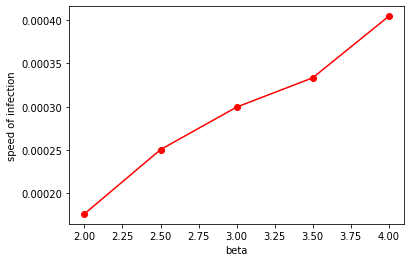

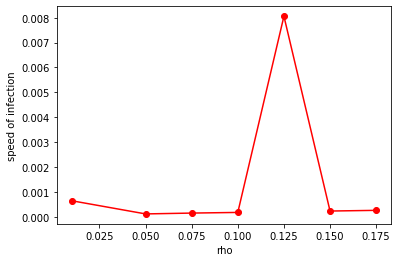

In [32]:
#!!!!!!!!we want to use a loop to change beta and rho.
###but there is someting alway wrong with the loop.so we have to change the beta and rho respectively in the code
###so actually u can just see the these two plot :)#


plt.plot(beta_list,v1_list,'ro-')
plt.xlabel("beta")
plt.ylabel("speed of infection")
print(beta_list)
print(v_list)
plt.show()
plt.plot(rho_list,v_list,'ro-')
plt.xlabel("rho")
plt.ylabel("speed of infection")
plt.show()

Text(0, 0.5, 'speed of infection')

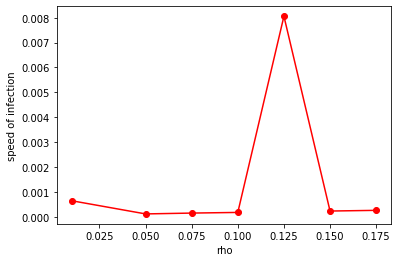

In [17]:
pl.plot(rho_list,v_list,'ro-')
pl.xlabel("rho")
pl.ylabel("speed of infection")

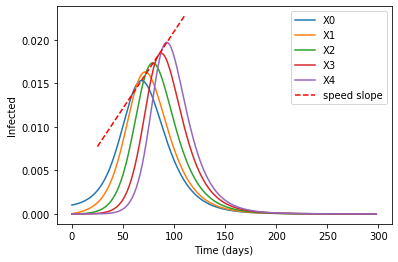

speed is 0.00017623830997728332
[0.00017623830997728332]


In [23]:
#We write the code seperatly beta=2
import scipy.integrate as spi
import numpy as np
import pylab as pl  
v1_list=[]
#final infectious list
n=9;
gamma=0.1;
mu=0.0001;
rho=0.1;
X0=0.1;
N0=1.0;
nu=mu
beta_list=[]

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300



beta1=2
infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta1,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,110],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(110-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v1=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v1)
v1_list.append(v1)
beta_list.append(beta1)
print(v1_list)


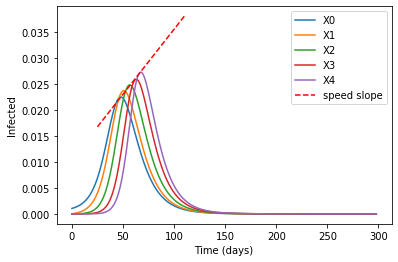

speed is 0.00025043777629152607
[0.00017623830997728332, 0.00025043777629152607]


In [24]:
#beta=2.5
n=9;
gamma=0.1;
mu=0.0001;
rho=0.1;
X0=0.1;
N0=1.0;
nu=mu

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300



beta2=2.5
infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta2,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,110],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(110-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()  
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v2=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v2)
v1_list.append(v2)
beta_list.append(beta2)
print(v1_list)


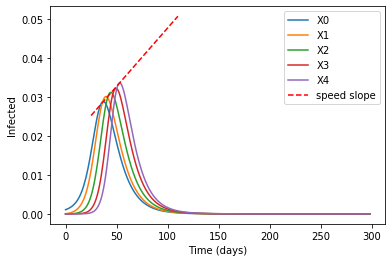

speed is 0.0002995269330744563
[0.00017623830997728332, 0.00025043777629152607, 0.0002995269330744563]


In [25]:
#beta=3
n=9;
gamma=0.1;
mu=0.0001;
rho=0.1;
X0=0.1;
N0=1.0;
nu=mu

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300



beta3=3
infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta3,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,110],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(110-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend() 
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v3=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v3)
v1_list.append(v3)
beta_list.append(beta3)
print(v1_list)


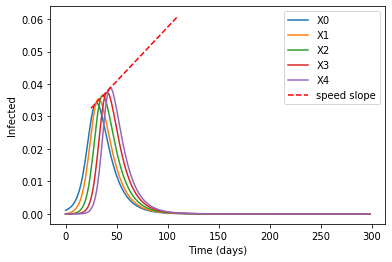

speed is 0.00033332638562509474
[0.00017623830997728332, 0.00025043777629152607, 0.0002995269330744563, 0.00033332638562509474]


In [26]:
#beta=3.5
n=9;
gamma=0.1;
mu=0.0001;
rho=0.1;
X0=0.1;
N0=1.0;
nu=mu

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300



beta4=3.5
infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta4,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,110],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(110-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v4=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v4)
v1_list.append(v4)
beta_list.append(beta4)
print(v1_list)


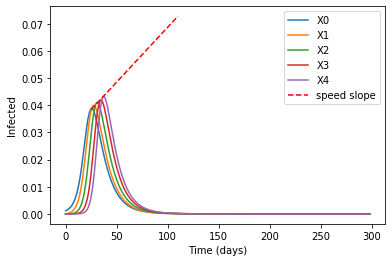

speed is 0.0004043936766864364
[0.00017623830997728332, 0.00025043777629152607, 0.0002995269330744563, 0.00033332638562509474, 0.0004043936766864364]


In [27]:
#beta=4
n=9;
gamma=0.1;
mu=0.0001;
rho=0.1;
X0=0.1;
N0=1.0;
nu=mu

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300



beta5=4
infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta5,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,110],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(110-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v5=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v5)
v1_list.append(v5)
beta_list.append(beta5)
print(v1_list)


[2, 2.5, 3, 3.5, 4]
[0.0006450312532585603, 0.00011635074235862386, 0.0001500449635265549, 0.00017623830997728332, 0.00805763470581209, 0.00023188864869578621, 0.0002598117381377643]


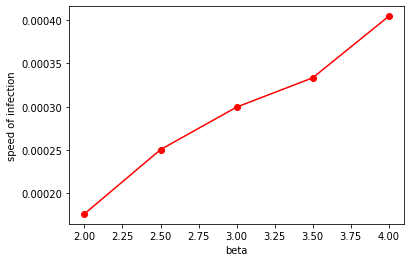

In [28]:
pl.plot(beta_list,v1_list,'ro-')
pl.xlabel("beta")
pl.ylabel("speed of infection")
print(beta_list)
print(v_list)

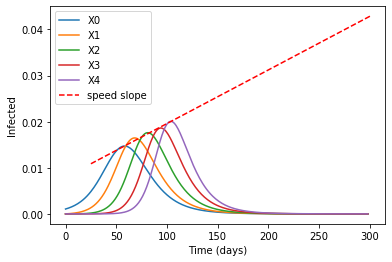

speed is 0.00011635074235657839
[0.00011635074235657839]


In [8]:
import scipy.integrate as spi
import numpy as np
import pylab as pl  
v_list=[]
rho_list=[]
#final infectious list
n=9;
beta=2;
gamma=0.1;
mu=0.0001;
rho=0.05;
X0=0.1;
N0=1.0;
nu=mu

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300
infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,300],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(300-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v1=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v1)
v_list.append(v1)
rho_list.append(rho)
print(v_list)


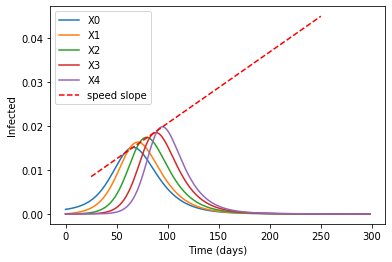

speed is 0.0001619504734889988
[0.00011635074235657839, 0.0001619504734889988]


In [9]:
n=9;
gamma=0.1;
mu=0.0001;
rho=0.0867;
X0=0.1;
N0=1.0;
nu=mu

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300

beta=2
infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,250],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(250-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v2=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v2)
v_list.append(v2)
rho_list.append(rho)
print(v_list)


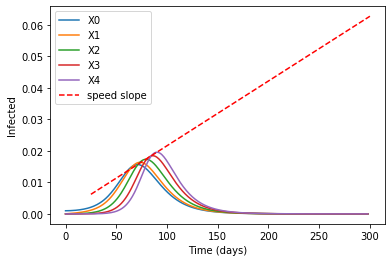

speed is 0.00020553943590814438
[0.00011635074235657839, 0.0001619504734889988, 0.00020553943590814438]


In [10]:
n=9;
gamma=0.1;
mu=0.0001;
rho=0.125;
X0=0.1;
N0=1.0;
nu=mu
beta=2

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300

infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,300],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(300-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend() 
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v3=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v3)
v_list.append(v3)
rho_list.append(rho)
print(v_list)


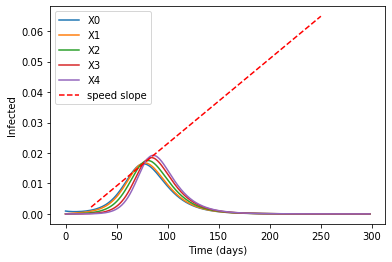

speed is 0.0002785501688607816
[0.00011635074235657839, 0.0001619504734889988, 0.00020553943590814438, 0.0002785501688607816]


In [11]:
n=9;
gamma=0.1;
mu=0.0001;
rho=0.2017;
X0=0.1;
N0=1.0;
nu=mu
beta=2

X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300


infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,250],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(250-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v4=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v4)
v_list.append(v4)
rho_list.append(rho)
print(v_list)


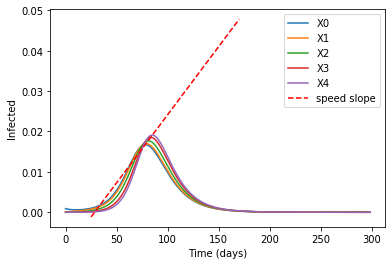

speed is 0.00033733953518037964
[0.00011635074235657839, 0.0001619504734889988, 0.00020553943590814438, 0.0002785501688607816, 0.00033733953518037964]


In [12]:
n=9;
gamma=0.1;
mu=0.0001;
rho=0.24;
X0=0.1;
N0=1.0;
nu=mu
beta=2
X=X0*np.ones((n,n))
Y=np.zeros(n*n); 
ind=[40]
for i in range(len(ind)):
    index=int(ind[i])
    Y[index]=0.01*X0;# initial susceptible

INPUT1=np.hstack((X0*np.ones((n*n)),Y))

Y3=Y#原先的Y
Y=np.reshape(Y, ((n,n)))
#Y2=Y#更新后的Y

INPUT3=np.hstack((X,Y));

INPUT2=np.reshape(INPUT3, ((2*n*n,1)))

for i in range(len(INPUT1)):
    INPUT1[i]=INPUT2[i]
#可是这一步并没有改变INPUT1的值？？？？？

INPUT=INPUT1
ndem=np.zeros((n,n))
Size=n
N=N0
## Note the size loop
for i in range(Size):
    for j in range(Size):
        ndem[i][j]=(1-4*rho)*N
        if i>0 : ndem[i][j] += rho*N
        if i<(Size-1) : ndem[i][j] += rho*N
        if j>0 : ndem[i][j] += rho*N
        if j<(Size-1) : ndem[i][j] += rho*N
            
def diff_eqs(INP,t,beta):
    V=INP
    Y=np.zeros(2*n*n)

    ### internal dynamics
    for i in range(Size):
        for j in range(Size):
            ss=i+j*Size*2
            ii=Size+i+j*Size*2
            Y[ss]=nu - beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - mu * V[ss]
            Y[ii]=beta*(1-4*rho)*V[ss]*V[ii]/ndem[i][j] - (gamma + mu) * V[ii]
        
            ### Interactions with four neighbours
            if i>0: 
                FoI = beta*V[ss]*rho*V[ii-1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if i<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+1]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j>0:
                FoI = beta*V[ss]*rho*V[ii-Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
            if j<(Size-1):
                FoI = beta*V[ss]*rho*V[ii+Size*2]/ndem[i][j]
                Y[ss]-=FoI
                Y[ii]+=FoI
            
    return Y

ND=300


infect_00=[]
infect_01=[]
infect_02=[]
infect_03=[]
infect_04=[]

pl.ion()
for k in range(ND):
    t_range = np.arange(2.0)#只积分一步
    RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,))
    #print(RES)
    INPUT=RES[-1]
    infect_00.append(RES[-1][Size*9+4])
    infect_01.append(RES[-1][Size*9+5])
    infect_02.append(RES[-1][Size*9+6])
    infect_03.append(RES[-1][Size*9+7])
    infect_04.append(RES[-1][Size*9+8])
    
    if k%2==0:
        pl.clf()
        pl.plot(infect_00,label="X0")
        pl.plot(infect_01,label="X1")
        pl.plot(infect_02,label="X2")
        pl.plot(infect_03,label="X3")
        pl.plot(infect_04,label="X4")            
        pl.ylabel('Infected')
        pl.xlabel('Time (days)')
        pl.draw()
speed_slope=(max(infect_04)-max(infect_00))/(infect_04.index(max(infect_04))-infect_00.index(max(infect_00)))                                                              
pl.plot([25,170],[(speed_slope*(25-infect_00.index(max(infect_00)))+ max(infect_00)),(speed_slope*(170-infect_00.index(max(infect_00)))+ max(infect_00))], 'r--',label="speed slope")
pl.legend()
pl.ioff()
pl.show()  

epidemic_00=infect_00.index(max(infect_00))
epidemic_04=infect_04.index(max(infect_04))
v5=(max(infect_04)-max(infect_00))/(epidemic_04-epidemic_00)
print("speed is",v5)
v_list.append(v5)
rho_list.append(rho)
print(v_list)


Text(0, 0.5, 'speed of infection')

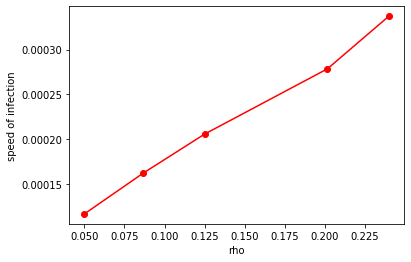

In [13]:
pl.plot(rho_list,v_list,'ro-')
pl.xlabel("rho")
pl.ylabel("speed of infection")